# Proyecto: prueba A/B

**Objetivo:** investigar el comportamiento del usuario para la aplicación de la empresa.

In [297]:
# Cargar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [298]:
# Cargar base de datos
df=pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [299]:
df.sample(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
126628,OffersScreenAppear,7984672678297688740,1564926527,247
217144,MainScreenAppear,7273808698005665705,1565158979,247
213952,CartScreenAppear,8181826950959369298,1565148710,246
138916,PaymentScreenSuccessful,6234930871538147758,1564948891,247
124839,MainScreenAppear,80958523570010555,1564923465,247
216661,MainScreenAppear,1558759113021351652,1565157697,246
96487,MainScreenAppear,5668751087163364875,1564844034,246
47078,PaymentScreenSuccessful,2666089332487652109,1564733144,247
5908,MainScreenAppear,5927271827887183646,1564638576,248
170928,MainScreenAppear,6421065471506532863,1565026878,246


In [300]:
#Visualizar eventos
df['EventName'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: EventName, dtype: int64

In [301]:
#Visualizar experimentos
df['ExpId'].value_counts()

248    85747
246    80304
247    78075
Name: ExpId, dtype: int64

In [302]:
#Visualizar usuarios
len(df['DeviceIDHash'].value_counts())

7551

# Procesamiento de datos

In [303]:
#Cambiar las columnas a minusculas
def x(df):
    df.columns = (
        df.columns
        .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)
        .str.lower() 
    )
    return df

df = x(df)

In [304]:
df.columns

Index(['event_name', 'device_idhash', 'event_timestamp', 'exp_id'], dtype='object')

In [305]:
# Ajusta el tipo de datos event_timestamp
df['event_timestamp']=pd.to_datetime(df['event_timestamp'], unit='s')
df.sample(10)

,event_name,device_idhash,event_timestamp,exp_id
126062,OffersScreenAppear,1656055605943893565,2019-08-04 13:31:02,248
10551,OffersScreenAppear,6932517045703054087,2019-08-01 08:35:46,248
98478,MainScreenAppear,5435933625972989901,2019-08-03 15:44:54,247
117672,CartScreenAppear,3006207371161637636,2019-08-04 10:03:36,248
188203,PaymentScreenSuccessful,2655003569661492360,2019-08-06 09:42:18,248
151888,PaymentScreenSuccessful,1100007125648169445,2019-08-05 10:10:33,248
149340,MainScreenAppear,4229232782226689238,2019-08-05 08:58:22,248
239986,OffersScreenAppear,8444526599595657459,2019-08-07 18:03:10,246
51371,CartScreenAppear,6124233129910171828,2019-08-02 10:08:56,247
90887,PaymentScreenSuccessful,9070105870042240910,2019-08-03 12:28:18,247


In [306]:
#Extraer la fecha corta
df['date']=df['event_timestamp'].dt.floor('d')
df.sample(10)

,event_name,device_idhash,event_timestamp,exp_id,date
31205,MainScreenAppear,6852550964038408882,2019-08-01 17:18:02,247,2019-08-01
145108,MainScreenAppear,2013324538743167661,2019-08-05 06:28:41,247,2019-08-05
108969,MainScreenAppear,8871118565162926421,2019-08-04 03:48:56,248,2019-08-04
7156,MainScreenAppear,6718487615656465356,2019-08-01 06:40:06,248,2019-08-01
211809,CartScreenAppear,5609174282068681071,2019-08-06 20:34:53,246,2019-08-06
176377,MainScreenAppear,1993661765020743894,2019-08-05 21:32:49,247,2019-08-05
50990,MainScreenAppear,3747228656330050058,2019-08-02 09:57:12,247,2019-08-02
33293,MainScreenAppear,9110608674894233944,2019-08-01 18:12:14,246,2019-08-01
116572,MainScreenAppear,1205861688508008444,2019-08-04 09:28:15,248,2019-08-04
183057,OffersScreenAppear,7190115534376186237,2019-08-06 06:53:54,248,2019-08-06


In [307]:
df['date'].describe()

count                  244126
unique                     14
top       2019-08-01 00:00:00
freq                    36229
first     2019-07-25 00:00:00
last      2019-08-07 00:00:00
Name: date, dtype: object

Los datos cubren el periodo de tiempo desde 25 de julio del 2019 hasta el 7 de agosto del 2019

In [308]:
#Extraer la hora
df['hour']=df['event_timestamp'].dt.hour
df.sample(10)

,event_name,device_idhash,event_timestamp,exp_id,date,hour
1728,MainScreenAppear,8441857084024683664,2019-07-31 17:32:17,246,2019-07-31,17
73978,OffersScreenAppear,7947548393357958796,2019-08-02 21:27:07,248,2019-08-02,21
180622,PaymentScreenSuccessful,1449633191757318122,2019-08-06 05:35:22,248,2019-08-06,5
18313,OffersScreenAppear,9097760240767809307,2019-08-01 12:13:21,247,2019-08-01,12
191761,MainScreenAppear,4229497205630462633,2019-08-06 11:31:36,248,2019-08-06,11
5840,MainScreenAppear,1794255936427555766,2019-08-01 05:45:54,246,2019-08-01,5
123746,CartScreenAppear,7984672678297688740,2019-08-04 12:33:03,247,2019-08-04,12
51289,MainScreenAppear,2369051545818445652,2019-08-02 10:06:20,246,2019-08-02,10
168196,MainScreenAppear,7702139951469979,2019-08-05 16:39:17,247,2019-08-05,16
150539,MainScreenAppear,4027877080668199165,2019-08-05 09:37:16,247,2019-08-05,9


In [309]:
# Cambiar los nombres de exp_id para mayor facilidad
def exp_sem(x):
    if x==246:
        return 'A1'
    elif x==247:
        return 'A2'
    else:
            return 'B'
df['group']=df['exp_id'].apply(exp_sem)
df.sample(10)

,event_name,device_idhash,event_timestamp,exp_id,date,hour,group
106092,MainScreenAppear,6779562535677168482,2019-08-03 19:47:46,248,2019-08-03,19,B
108959,OffersScreenAppear,9110248565804959041,2019-08-04 03:46:14,248,2019-08-04,3,B
161847,OffersScreenAppear,4117244457378452102,2019-08-05 14:26:29,248,2019-08-05,14,B
23901,OffersScreenAppear,9198403615978777375,2019-08-01 14:25:50,248,2019-08-01,14,B
118699,MainScreenAppear,3337471580007169353,2019-08-04 10:26:34,246,2019-08-04,10,A1
165373,OffersScreenAppear,2570971451355530886,2019-08-05 15:38:54,248,2019-08-05,15,B
37808,OffersScreenAppear,8417301349328836600,2019-08-01 20:58:45,247,2019-08-01,20,A2
220315,OffersScreenAppear,4581794435043716955,2019-08-07 08:35:02,247,2019-08-07,8,A2
86847,PaymentScreenSuccessful,7738058666231999878,2019-08-03 10:58:06,246,2019-08-03,10,A1
136527,MainScreenAppear,7319595331328625081,2019-08-04 18:23:58,248,2019-08-04,18,B


# Análisis exploratorio

In [310]:
events=len(df)
days=len(df['date'].unique())
users=len(df['device_idhash'].unique())
events_per_user=events/users
events_per_day=events/days

print('KPI SUMMARY')
print('===========')
print(f'{events:,} events')
print(f'{days:,} days')
print(f'{users:,} users')
print(f'{events_per_user:.2f} events per users')
print(f'{events_per_day:.0f} events per day')

KPI SUMMARY
244,126 events
14 days
7,551 users
32.33 events per users
17438 events per day


In [311]:
events_by_date = df.groupby('date').agg(events=('event_name', 'count')).reset_index()
events_by_date

,date,events
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,413
6,2019-07-31,2031
7,2019-08-01,36229
8,2019-08-02,35606
9,2019-08-03,33351


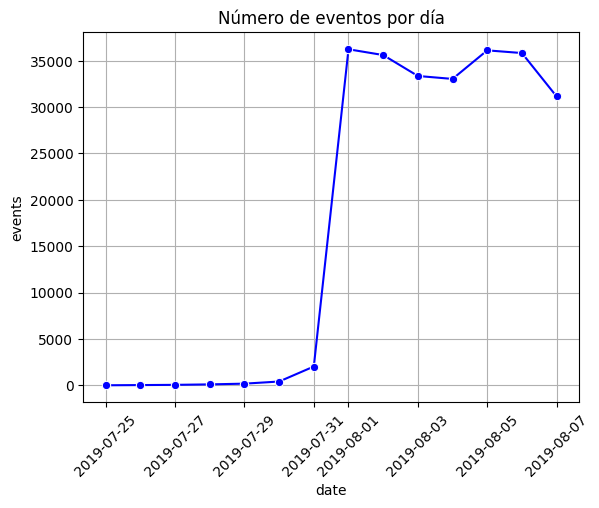

In [312]:
#Graficar
sns.lineplot(
data=events_by_date,
x='date',
y='events',
marker='o')

plt.title('Número de eventos por día')
plt.xticks(rotation=45)
plt.grid()
plt.show()

A partir del primero de agosto se empezaron a evidenciar cambios, por tal motivo, se debe utilizar la fecha a partir del primero de agosto

In [313]:
# Eliminar fechas con poca información
df=df.query("date >='2019-08-01'")

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241298 entries, 2828 to 244125
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       241298 non-null  object        
 1   device_idhash    241298 non-null  int64         
 2   event_timestamp  241298 non-null  datetime64[ns]
 3   exp_id           241298 non-null  int64         
 4   date             241298 non-null  datetime64[ns]
 5   hour             241298 non-null  int64         
 6   group            241298 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 14.7+ MB


In [315]:
print(f"se perdieron en total {244126 -241298} datos")

se perdieron en total 2828 datos


**Comportamientos por hora**

In [316]:
events_by_hours = df.groupby(['date','hour']).agg(events=('event_name', 'count')).reset_index()
events_by_hours

,date,hour,events
0,2019-08-01,0,192
1,2019-08-01,1,228
2,2019-08-01,2,329
3,2019-08-01,3,658
4,2019-08-01,4,838
...,...,...,...
161,2019-08-07,17,1908
162,2019-08-07,18,1680
163,2019-08-07,19,1514
164,2019-08-07,20,949


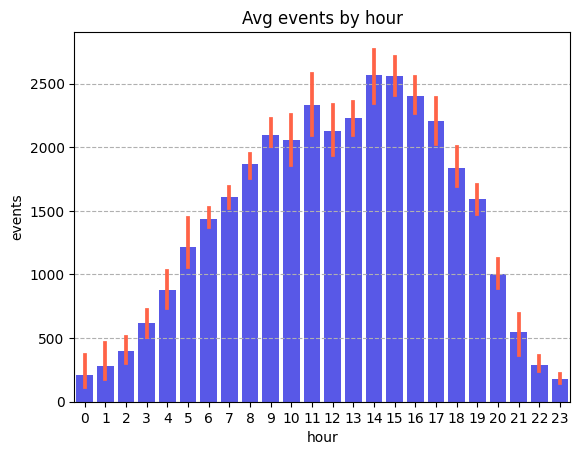

In [317]:
g=sns.barplot(
data=events_by_hours,
x='hour',
y='events',
color='blue',
alpha=0.75,
errcolor='tomato')

plt.grid(axis='y',linestyle='--')
plt.title('Avg events by hour')
plt.show()

Se puede concluir que los datos se encuentran balanceados, las horas con mayor actividad están entre las 6 hasta las 19 horas.

**Balance del experimento**

In [318]:
events_by_exp=df.groupby('group').agg(events=('event_name','count'))
events_by_exp['share']=round(events_by_exp['events']/events_by_exp['events'].sum()*100,1)
events_by_exp

,events,share
group,,
A1,79425,32.9
A2,77147,32.0
B,84726,35.1


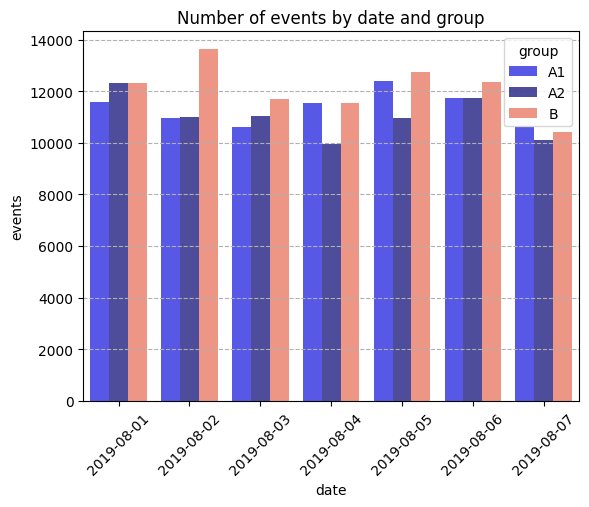

In [319]:
events_by_dategroup = df.groupby(['date', 'group']).agg(events=('event_name', 'count')).reset_index()

# Configuración de colores
sns.set_palette(['blue', 'darkblue', 'tomato'])

# Gráfico de barras
sns.barplot(
    data=events_by_dategroup,
    x='date',
    y='events',
    hue='group',
    alpha=0.75
)

plt.title('Number of events by date and group')
plt.xticks(ticks=range(len(events_by_dategroup['date'].unique())),labels=events_by_dategroup['date'].dt.strftime('%Y-%m-%d').unique(),rotation=45)  # Rotar etiquetas si hay muchas fechas
plt.grid(axis='y', linestyle='--')
plt.show()


**Prueba AA/B**

Realizar un Funnel de eventos por grupos

In [320]:
#Funnel A1
funnel_A1=(
df
.query("group=='A1'")
.pivot_table(index='event_name', values='device_idhash',aggfunc='nunique')
.sort_values('device_idhash',ascending=False)
.drop(index='Tutorial'))

funnel_A1

,device_idhash
event_name,
MainScreenAppear,2450
OffersScreenAppear,1542
CartScreenAppear,1266
PaymentScreenSuccessful,1200


In [321]:
#Calcular la conversión
n_A1=funnel_A1['device_idhash'].max()
funnel_A1['convA1']=100*funnel_A1['device_idhash']/n_A1
funnel_A1.drop(columns='device_idhash', inplace=True)
funnel_A1

,convA1
event_name,
MainScreenAppear,100.000000
OffersScreenAppear,62.938776
CartScreenAppear,51.673469
PaymentScreenSuccessful,48.979592


In [322]:
#Funnel A2
funnel_A2=(
df
.query("group=='A2'")
.pivot_table(index='event_name', values='device_idhash',aggfunc='nunique')
.sort_values('device_idhash',ascending=False)
.drop(index='Tutorial'))

funnel_A2

#Calcular la conversión
n_A2=funnel_A2['device_idhash'].max()
funnel_A2['convA2']=100*funnel_A2['device_idhash']/n_A2
funnel_A2.drop(columns='device_idhash', inplace=True)
funnel_A2

,convA2
event_name,
MainScreenAppear,100.000000
OffersScreenAppear,61.389338
CartScreenAppear,50.000000
PaymentScreenSuccessful,46.768982


In [323]:
#Funnel B
funnel_B=(
df
.query("group=='B'")
.pivot_table(index='event_name', values='device_idhash',aggfunc='nunique')
.sort_values('device_idhash',ascending=False)
.drop(index='Tutorial'))

funnel_A2

#Calcular la conversión
n_B=funnel_B['device_idhash'].max()
funnel_B['convA2']=100*funnel_B['device_idhash']/n_B
funnel_B.drop(columns='device_idhash', inplace=True)
funnel_B

,convA2
event_name,
MainScreenAppear,100.000000
OffersScreenAppear,61.411953
CartScreenAppear,49.338147
PaymentScreenSuccessful,47.372643


In [324]:
#Funnel agregado
funnel=funnel_A1.merge(
funnel_A2,
on='event_name').merge(
funnel_B,
on='event_name')
funnel.columns=['A1','A2','B']
funnel

,A1,A2,B
event_name,,,
MainScreenAppear,100.000000,100.000000,100.000000
OffersScreenAppear,62.938776,61.389338,61.411953
CartScreenAppear,51.673469,50.000000,49.338147
PaymentScreenSuccessful,48.979592,46.768982,47.372643


El evento más popular después del MainScreenAppear es el OffersScreenAppear

<function matplotlib.pyplot.show(close=None, block=None)>

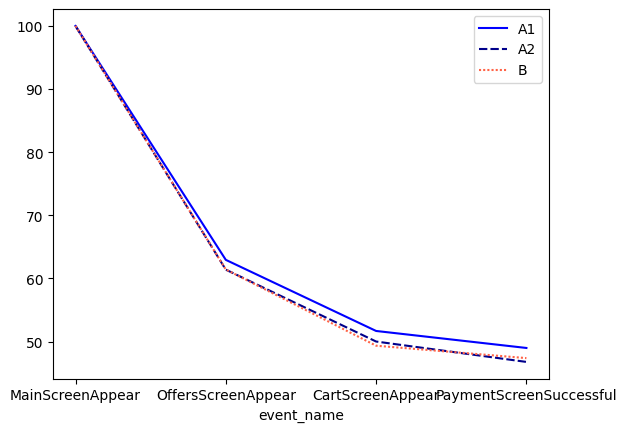

In [325]:
#Graficar 
sns.lineplot(
data=funnel)
plt.show

No se evidencian grandes cambios, pero el grupo A2 y B están experimentando cambios que deben revisarse

# Pruebas de hipótesis

p1 y p2 son tasas de conversión en distintos momentos

Hipótesis nula: p1=p2

Hipótesis alternativa: p1 !=p2

In [326]:
# Lista con número de observaciones
n=pd.Series([n_A1,n_A2,n_B], index=['A1','A2','B'])
n

A1    2450
A2    2476
B     2493
dtype: int64

In [327]:
#Evaluar si la tasa de conversión son diferentes en el evento "OffersScreenAppear" entre A1 y A2 para garantizar la confiabilida'
alpha=0.05
#Muestra 1
p_1=funnel.loc["OffersScreenAppear", "A1"]/100
suc_1=int(p_1*n["A1"])
suc_1

#Muestra 2
p_2=funnel.loc["OffersScreenAppear", "A2"]/100
suc_2=int(p_2*n["A2"])
suc_2

suc=[suc_1,suc_2]
obs=[n["A1"],n["A2"]]

z_stat, pval=proportions_ztest(
count=suc,
nobs=obs,
alternative="two-sided"
)
print(f"Valor p: {pval*100:.1f}%")
(inf_1, inf_2), (sup_1,sup_2)=proportion_confint(
count=suc,
nobs=obs,
alpha=alpha)
print (f"Intervalo de confianza para A1: [{inf_1*100:.1f}%,{sup_1*100:.1f}%]")
print (f"Intervalo de confianza para A2: [{inf_2*100:.1f}%,{sup_2*100:.1f}%]")

Valor p: 26.2%
Intervalo de confianza para A1: [61.0%,64.9%]
Intervalo de confianza para A2: [59.5%,63.3%]


No se rechaza la hipótesis nulas, las tasas de conversión son iguales.

In [328]:
def prueba_ab(e, g1, g2, alpha=0.05):
    
    # Muestra 1
    p_1 = funnel.loc[e, g1] / 100
    suc_1 = int(p_1 * n[g1])  

    # Muestra 2
    p_2 = funnel.loc[e, g2] / 100
    suc_2 = int(p_2 * n[g2])  
    suc_2

    suc=[suc_1,suc_2]
    obs=[n[g1],n[g2]]
    
    # Prueba Z de proporciones
    z_stat, pval = proportions_ztest(
        count=suc, 
        nobs=obs,  
        alternative='two-sided'
    )

    print(f"Valor p: {pval * 100:.1f}%")
    (inf_1, inf_2), (sup_1, sup_2)=proportion_confint(
    count=suc,
    nobs=obs,
    alpha=alpha)
    
    print (f"Intervalo de confianza para {g1}: [{inf_1*100:.1f}%,{sup_1*100:.1f}%]")
    print (f"Intervalo de confianza para {g2}: [{inf_2*100:.1f}%,{sup_2*100:.1f}%]")
    
    if pval > alpha:
        print("No se rechaza la hipótesis nula, las tasas de conversión son iguales")
    else:
        print("Se rechaza la hipótesis nula, las tasas de conversión no son iguales")
    
    return pval 

In [329]:
# Comprobar si existe si hay diferencia entre A1 y A2
A1_A2=[]
for event in funnel.index[1:]:
    print(f"Evento: {event}")
    print("===================")
    A1_A2.append(prueba_ab(event, "A1", "A2"))  
    print("\n")  

Evento: OffersScreenAppear
Valor p: 26.2%
Intervalo de confianza para A1: [61.0%,64.9%]
Intervalo de confianza para A2: [59.5%,63.3%]
No se rechaza la hipótesis nula, las tasas de conversión son iguales


Evento: CartScreenAppear
Valor p: 24.0%
Intervalo de confianza para A1: [49.7%,53.7%]
Intervalo de confianza para A2: [48.0%,52.0%]
No se rechaza la hipótesis nula, las tasas de conversión son iguales


Evento: PaymentScreenSuccessful
Valor p: 12.0%
Intervalo de confianza para A1: [47.0%,51.0%]
Intervalo de confianza para A2: [44.8%,48.7%]
No se rechaza la hipótesis nula, las tasas de conversión son iguales




In [330]:
# Comprobar si existe si hay diferencia entre A1 y B
A1_B=[]
for event in funnel.index[1:]:
    print(f"Evento: {event}")
    print("===================")
    A1_A2.append(prueba_ab(event, "A1", "B"))  
    print("\n")

Evento: OffersScreenAppear
Valor p: 25.6%
Intervalo de confianza para A1: [61.0%,64.9%]
Intervalo de confianza para B: [59.5%,63.3%]
No se rechaza la hipótesis nula, las tasas de conversión son iguales


Evento: CartScreenAppear
Valor p: 10.1%
Intervalo de confianza para A1: [49.7%,53.7%]
Intervalo de confianza para B: [47.4%,51.3%]
No se rechaza la hipótesis nula, las tasas de conversión son iguales


Evento: PaymentScreenSuccessful
Valor p: 25.8%
Intervalo de confianza para A1: [47.0%,51.0%]
Intervalo de confianza para B: [45.4%,49.3%]
No se rechaza la hipótesis nula, las tasas de conversión son iguales




No hay cambios significativos, por tal motivo, se debe suspender la prueba. 

In [331]:
# Revisar con un nivel de significancia de 0.01
# Comprobar si existe si hay diferencia entre A1 y A2
A1_A2_alpha_001 = []

# Ejecutar la prueba A/B con un nivel de significancia de 0.01
for event in funnel.index[1:]:
    print(f"Evento: {event}")
    print("===================")
    A1_A2_alpha_001.append(prueba_ab(event, "A1", "A2", alpha=0.15))
    print("\n") 

Evento: OffersScreenAppear
Valor p: 26.2%
Intervalo de confianza para A1: [61.5%,64.3%]
Intervalo de confianza para A2: [60.0%,62.8%]
No se rechaza la hipótesis nula, las tasas de conversión son iguales


Evento: CartScreenAppear
Valor p: 24.0%
Intervalo de confianza para A1: [50.2%,53.1%]
Intervalo de confianza para A2: [48.6%,51.4%]
No se rechaza la hipótesis nula, las tasas de conversión son iguales


Evento: PaymentScreenSuccessful
Valor p: 12.0%
Intervalo de confianza para A1: [47.5%,50.4%]
Intervalo de confianza para A2: [45.3%,48.2%]
Se rechaza la hipótesis nula, las tasas de conversión no son iguales




In [332]:
# Comprobar si existe si hay diferencia entre A1 y B
A1_B_alpha_001=[]
for event in funnel.index[1:]:
    print(f"Evento: {event}")
    print("===================")
    A1_A2.append(prueba_ab(event, "A1", "B", alpha=0.15))  
    print("\n")

Evento: OffersScreenAppear
Valor p: 25.6%
Intervalo de confianza para A1: [61.5%,64.3%]
Intervalo de confianza para B: [60.0%,62.8%]
No se rechaza la hipótesis nula, las tasas de conversión son iguales


Evento: CartScreenAppear
Valor p: 10.1%
Intervalo de confianza para A1: [50.2%,53.1%]
Intervalo de confianza para B: [47.9%,50.8%]
Se rechaza la hipótesis nula, las tasas de conversión no son iguales


Evento: PaymentScreenSuccessful
Valor p: 25.8%
Intervalo de confianza para A1: [47.5%,50.4%]
Intervalo de confianza para B: [45.9%,48.8%]
No se rechaza la hipótesis nula, las tasas de conversión son iguales




**Conclusión:** Siendo más flexible con nuestra prubea, con un nivel de significancia del 0.15, se rechaza la H0 para la prueba A1_A2 para el evento PaymentScreenSuccessful, es decir la tasa de conversión son distintas. Asimimso para la prueba A1_B para el evento CartScreenAppear Se rechaza la hipótesis nula, las tasas de conversión no son iguales. Se debe suspender la prubea, lo cambios realizados al grupo B, no refleja una mejoría en la tasa de conversión.Se debe seguir estudiando otros factores que puedan mejorar.